In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd

In [2]:
#web scraping
URL ="https://finance.yahoo.com/quote/BTC-USD/history?period1=1410912000&period2=1629849600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true"
driver = webdriver.Chrome()
driver.get(URL)
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
soup.head

<head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Bitcoin USD (BTC-USD) Price, News, Quote &amp; History - Yahoo Finance</title><meta content="BTC-USD, Bitcoin USD, BTC-USD historical prices, Bitcoin USD historical prices, historical prices, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest Bitcoin USD (BTC-USD) price quote, history, news and other vital information to help you with your cryptocurrency trading and investing." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><meta content="A9862C0E6E1BE95BCE0BF3D0298FD58B" name="msvalidate.

In [3]:
#data cleaning
len_date=len(soup.find_all(class_="Py(10px) Ta(start) Pend(10px)"))
len_num= len(soup.find_all(class_="Py(10px) Pstart(10px)"))

In [4]:
#data cleaning
dictionary = {"date":[], "open":[], "high":[], "low":[], "close":[], "adj_close":[], "volume":[]}
lst_date = [dictionary["date"].append(soup.find_all(class_="Py(10px) Ta(start) Pend(10px)")[i].text) for i in range(len_date)]
lst_open = [dictionary["open"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(0,len_num,6)]
lst_high = [dictionary["high"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(1,len_num,6)]
lst_low = [dictionary["low"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(2,len_num,6)]
lst_close = [dictionary["close"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(3,len_num,6)]
lst_adj_close = [dictionary["adj_close"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(4,len_num,6)]
lst_volume = [dictionary["volume"].append(soup.find_all(class_="Py(10px) Pstart(10px)")[i].text) for i in range(5,len_num,6)]

# Data cleaning and preprocessing

In [5]:
df=pd.DataFrame(dictionary)
df["date"] = pd.to_datetime(df["date"])
df.replace(to_replace=r',', value='', regex=True, inplace=True)
df

,date,open,high,low,close,adj_close,volume
0,2021-08-01,41460.84,50482.08,37458.00,48829.83,48829.83,948096813985
1,2021-07-01,35035.98,42235.55,29360.96,41626.20,41626.20,819103381204
2,2021-06-01,37293.79,41295.27,28893.62,35040.84,35040.84,1189647451707
3,2021-05-01,57714.66,59519.36,30681.50,37332.86,37332.86,1976593438572
4,2021-04-01,58926.56,64863.10,47159.48,57750.18,57750.18,1844481772417
...,...,...,...,...,...,...,...
78,2015-02-01,216.87,265.61,212.01,254.26,254.26,711518700
79,2015-01-01,320.43,320.43,171.51,217.46,217.46,1098811912
80,2014-12-01,378.25,384.04,304.23,320.19,320.19,553102310
81,2014-11-01,338.65,457.09,320.63,378.05,378.05,659733360


In [6]:
df["open"] = [float(item) for item in df["open"]]
df["high"] = [float(item) for item in df["high"]]
df["low"] = [float(item) for item in df["low"]]
df["close"] = [float(item) for item in df["close"]]
df["adj_close"] = [float(item) for item in df["adj_close"]]
df["volume"] = [float(item) for item in df["volume"]]

In [7]:
df['amplitude%'] = (df['high'] - df['low'])/df['low']*100
#df['volume']= round(df['volume'] / 1000000 , 2)

# Data analysis

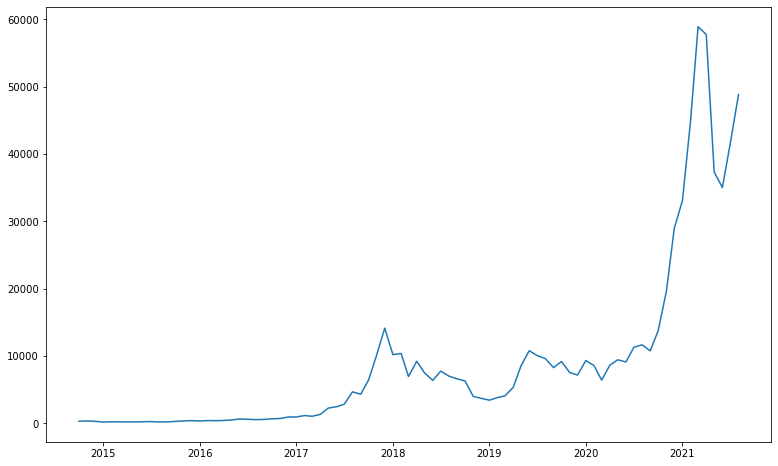

In [14]:
#1 Value of bitcoin from 2014-2021
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot()
ax.plot(df["date"], df["close"])


<AxesSubplot:xlabel='date'>

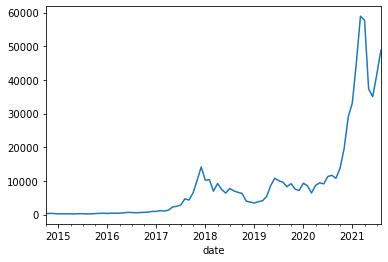

In [15]:
df.set_index('date')['close'].plot()

<AxesSubplot:xlabel='date'>

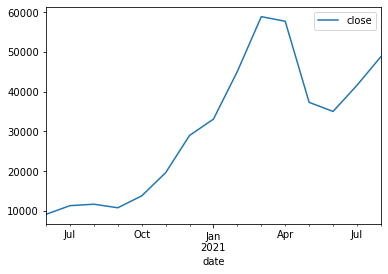

In [16]:
df.head(15).set_index('date')[['close']].plot()

<AxesSubplot:xlabel='Year', ylabel='Volume'>

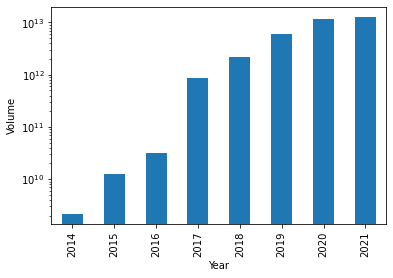

In [17]:
#2 Volume of bitcoin from 2014-2021
df["Year"] = df["date"].map(lambda x: x.year)
df.groupby("Year")["volume"].sum().plot(ylabel= "Volume", kind="bar", logy=True)

<AxesSubplot:>

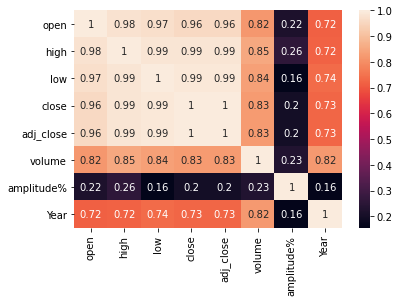

In [18]:
#3 Correlation graph
import seaborn as sns
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
#From the graph, we can see that all numbers are positive.
#Compare volume,value; amplitude,volume/value; year,value

In [19]:
df["Year"] = df["date"].apply(lambda x: x.year)
df

,date,open,high,low,close,adj_close,volume,amplitude%,Year
0,2021-08-01,41460.84,50482.08,37458.00,48829.83,48829.83,9.480968e+11,34.769822,2021
1,2021-07-01,35035.98,42235.55,29360.96,41626.20,41626.20,8.191034e+11,43.849350,2021
2,2021-06-01,37293.79,41295.27,28893.62,35040.84,35040.84,1.189647e+12,42.921759,2021
3,2021-05-01,57714.66,59519.36,30681.50,37332.86,37332.86,1.976593e+12,93.991037,2021
4,2021-04-01,58926.56,64863.10,47159.48,57750.18,57750.18,1.844482e+12,37.539897,2021
...,...,...,...,...,...,...,...,...,...
78,2015-02-01,216.87,265.61,212.01,254.26,254.26,7.115187e+08,25.281826,2015
79,2015-01-01,320.43,320.43,171.51,217.46,217.46,1.098812e+09,86.828756,2015
80,2014-12-01,378.25,384.04,304.23,320.19,320.19,5.531023e+08,26.233442,2014
81,2014-11-01,338.65,457.09,320.63,378.05,378.05,6.597334e+08,42.559960,2014


Text(0.5, 1.0, '')

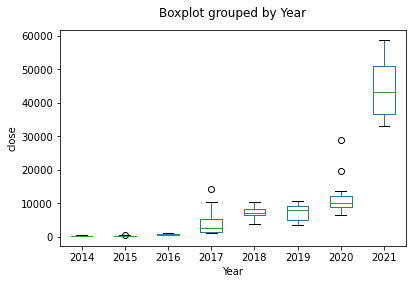

In [20]:
boxplot = df.boxplot(by="Year", column=["close"], grid=False)
boxplot.set_ylabel("close")
boxplot.set_title("")

In [21]:
# Volume summary against Month
volume = df.groupby(df['date'].dt.month).volume.sum()
volume.values

array([3.60059384e+12, 3.86621840e+12, 3.47749523e+12, 3.62225134e+12,
       4.22179557e+12, 2.69648796e+12, 2.21984902e+12, 2.38989108e+12,
       1.56245132e+12, 1.52361449e+12, 2.07463210e+12, 2.43141950e+12])

Text(0.5, 1.0, 'data range 2014.10.01-2021.8.25')

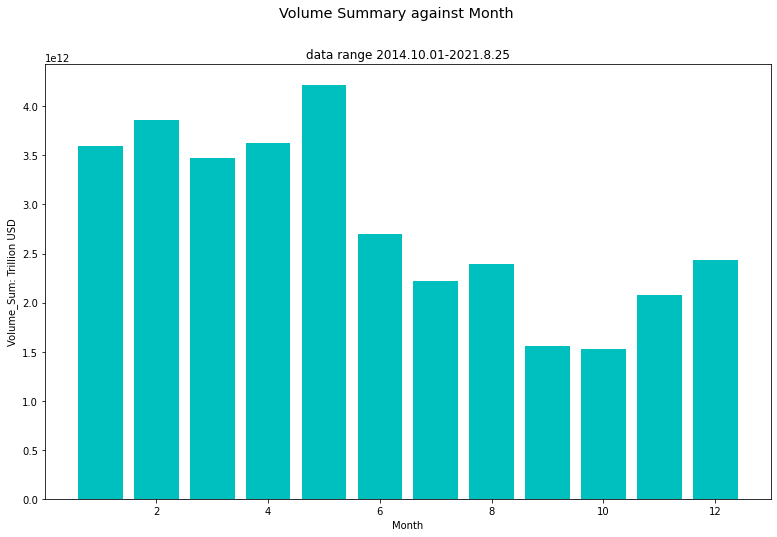

In [23]:
fig = plt.figure(figsize=(13,8)) 
plt.bar(x = volume.index, height = volume.values, color = 'c')
plt.xlabel('Month')
plt.ylabel('Volume_Sum: Trillion USD')
plt.suptitle("Volume Summary against Month",size = 'x-large')
plt.title('data range 2014.10.01-2021.8.25')

In [24]:
#Month Volume distribution: find calm and crazy months
df1= df
df1['year'] = df['date'].dt.year
df1['month'] = df['date'].dt.month
df1 = pd.pivot_table(df1,values='volume', index='year',columns='month')
df2 = df1

In [25]:
df2['mean'] = df1.mean(axis=1,skipna = True)
df2

month,1,2,3,4,5,6,7,8,9,10,11,12,mean
year,,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.029944e+08,6.597334e+08,5.531023e+08,7.052767e+08
2015,1.098812e+09,7.115187e+08,9.590983e+08,6.723387e+08,5.681226e+08,6.297802e+08,9.998922e+08,9.051923e+08,6.036239e+08,9.532795e+08,2.177623e+09,2.096250e+09,1.031294e+09
2016,1.990880e+09,1.876239e+09,2.332853e+09,1.811475e+09,2.234433e+09,4.749703e+09,3.454186e+09,2.686220e+09,2.004401e+09,2.115444e+09,2.635773e+09,3.556764e+09,2.620698e+09
2017,5.143972e+09,4.282761e+09,1.087246e+10,9.757448e+09,3.426186e+10,4.447814e+10,3.261996e+10,6.354802e+10,5.570095e+10,5.800936e+10,1.407350e+11,4.103365e+11,7.247887e+10
2018,4.162479e+11,2.297178e+11,1.937517e+11,1.965500e+11,1.976117e+11,1.302142e+11,1.414419e+11,1.322928e+11,1.297454e+11,1.184369e+11,1.583595e+11,1.688268e+11,1.844330e+11
2019,1.673357e+11,1.991007e+11,2.979528e+11,4.453646e+11,7.241579e+11,6.758554e+11,6.764163e+11,5.339850e+11,4.805450e+11,5.952051e+11,6.769195e+11,6.337904e+11,5.088857e+11
2020,8.528722e+11,1.163376e+12,1.290442e+12,1.123614e+12,1.286368e+12,6.509133e+11,5.458133e+11,7.083771e+11,8.938520e+11,7.479914e+11,1.093145e+12,1.212260e+12,9.640854e+11
2021,2.155904e+12,2.267153e+12,1.681184e+12,1.844482e+12,1.976593e+12,1.189647e+12,8.191034e+11,9.480968e+11,NaN,NaN,NaN,NaN,1.610271e+12


In [26]:
df3 = df2.iloc[:,:12].copy()
for i in range(len(df3)):
    for j in df3:
        df3.iloc[i,j-1] = (df2.iloc[i,j-1]/df2.iloc[i,12])
df3

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280341,0.935425,0.784234
2015,1.065469,0.689928,0.929995,0.651937,0.550883,0.610670,0.969551,0.877725,0.585307,0.924353,2.111544,2.032640
2016,0.759676,0.715931,0.890165,0.691219,0.852610,1.812381,1.318041,1.025002,0.764835,0.807206,1.005752,1.357182
2017,0.070972,0.059090,0.150009,0.134625,0.472715,0.613670,0.450062,0.876780,0.768513,0.800362,1.941739,5.661464
2018,2.256905,1.245535,1.050526,1.065698,1.071455,0.706024,0.766901,0.717294,0.703482,0.642167,0.858629,0.915383
2019,0.328828,0.391248,0.585500,0.875176,1.423027,1.328108,1.329211,1.049322,0.944308,1.169624,1.330200,1.245447
2020,0.884644,1.206715,1.338514,1.165471,1.334289,0.675161,0.566146,0.734766,0.927150,0.775856,1.133867,1.257419
2021,1.338846,1.407933,1.044038,1.145448,1.227492,0.738787,0.508674,0.588781,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'data range 2014.10.01-2021.8.25')

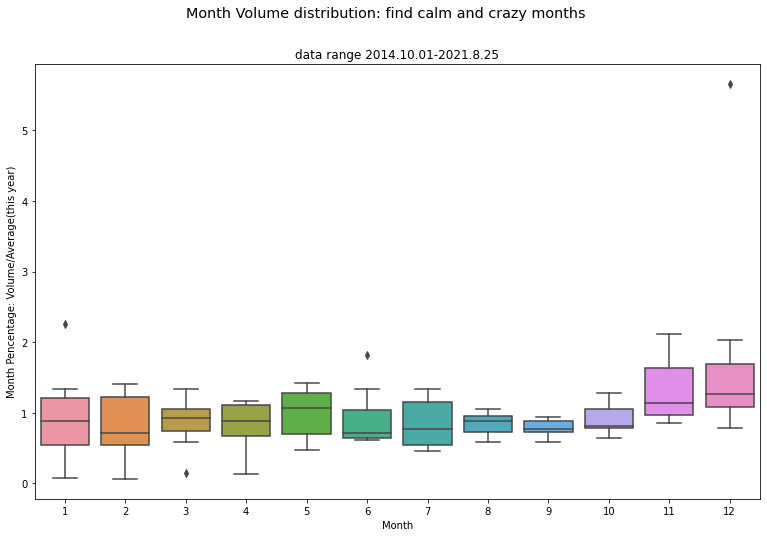

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(13,8)) 
sns.boxplot(data = df3)
plt.xlabel('Month')
plt.ylabel('Month Pencentage: Volume/Average(this year)')
plt.suptitle("Month Volume distribution: find calm and crazy months",size = 'x-large')
plt.title('data range 2014.10.01-2021.8.25')